In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [2]:
df=pd.read_csv("../input/house-rent-prediction-dataset/House_Rent_Dataset.csv")


In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


***looks like we dont have any null data. lets check again.***

In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

***EDA***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [9]:
#duplicated or not?

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

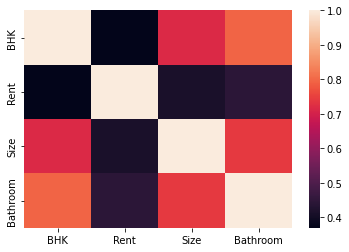

In [11]:
sns.heatmap(df.corr())

***we can see some corelations like between BHK and Bathroom, Size and Bathroom etc..***

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

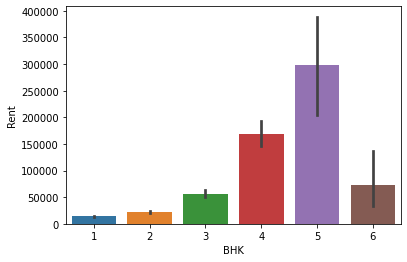

In [12]:
sns.barplot(x = df['BHK'], y = df['Rent'], data = df)

In [13]:
mean_rent=df.groupby('BHK')['Rent'].mean().sort_values()
print(mean_rent)

BHK
1     14139.223650
2     22113.864018
3     55863.062842
6     73125.000000
4    168864.555556
5    297500.000000
Name: Rent, dtype: float64


***It looks like houses that have 4 or 5 rooms are higher rent prices than 6. 6 bedroom houses can be out of the city or not big as 4 and 5 bedroom houses*.**

<AxesSubplot:xlabel='BHK', ylabel='Size'>

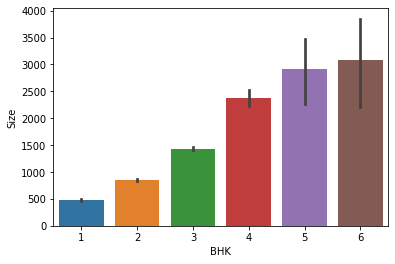

In [14]:
sns.barplot(x = df['BHK'], y = df['Size'], data = df)

In [15]:
mean_size=df.groupby('BHK')['Size'].mean().sort_values()
print(mean_size)

BHK
1     478.907455
2     852.072848
3    1432.367031
4    2382.190476
5    2910.947368
6    3075.000000
Name: Size, dtype: float64


<AxesSubplot:>

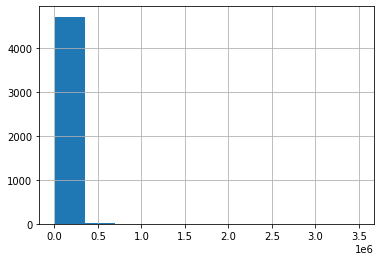

In [16]:
##??? NIYE
df['Rent'].hist()

***right skewed distribution.***

<AxesSubplot:xlabel='Rent'>

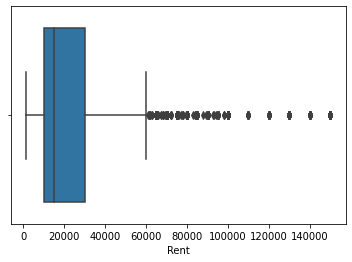

In [17]:
sns.boxplot(x = df['Rent'][df['Rent'] <= 150000])

***so the avg. of rent is between 10k to 30k.***

***lets find the mean of the rent for every cities.***

In [18]:
meancities = df.groupby('City')['Rent'].mean().sort_values()
print(meancities)

City
Kolkata      11645.173664
Hyderabad    20555.048387
Chennai      21614.092031
Bangalore    24966.365688
Delhi        29461.983471
Mumbai       85321.204733
Name: Rent, dtype: float64


<AxesSubplot:xlabel='City'>

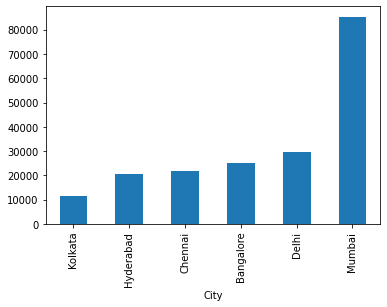

In [19]:
meancities.plot(kind="bar")

***now its time to delete some "unnecessary columns". there is nothing to do with "posted on" and "area locality" columns.***

In [20]:
df.drop(["Posted On"], axis="columns", inplace=True)
df.drop(["Area Locality"], axis="columns", inplace=True)


***lets see some distrubitions.***

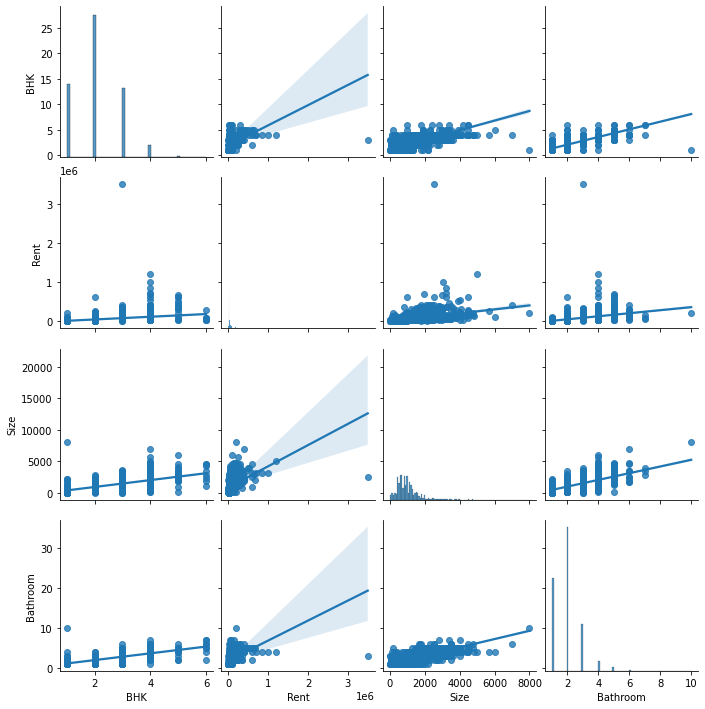

In [21]:
sns.pairplot(df, kind="reg")

In [22]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


***now we will change our categorical values to numerical so it will be more clear to read data.
"floor" column needs to change as "floor number" and "total floor" so instead of "3 out of 5" we will see 3 as a floor, 5 as a total floor.***

In [23]:
df["Floor"].describe()

count           4746
unique           480
top       1 out of 2
freq             379
Name: Floor, dtype: object

In [24]:
print(df["Floor"])

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object


In [25]:
df["Floor Number"]=df["Floor"].apply(lambda x:str(x).split()[0])

In [26]:
df["Total Floor"]=df["Floor"].apply(lambda x:str(x).split()[-1])

In [27]:
del df["Floor"]

***change "ground" to 0 ***

In [28]:
df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)


In [29]:
df["Floor Number"].value_counts()

1        1161
2         945
0         927
3         512
4         272
5         164
6          93
7          74
10         67
8          66
9          65
12         47
11         43
15         41
14         34
18         26
Upper      23
17         22
16         21
19         16
13         15
20         12
25         12
Lower      11
23          9
24          6
21          6
30          5
34          4
28          4
35          3
65          3
22          3
26          3
32          3
60          3
27          3
40          2
53          2
45          2
36          2
48          2
29          1
49          1
50          1
39          1
46          1
41          1
44          1
33          1
37          1
47          1
43          1
76          1
Name: Floor Number, dtype: int64

***lower basement means "-2",and Upper basement is -1.***

In [30]:
df["Floor Number"] = df["Floor Number"].replace(['Lower'],-2)


In [31]:

df["Floor Number"] = df["Floor Number"].replace(['Upper'],-1)


In [32]:

df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)

In [33]:
df.sample(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
4392,3,12000,1275,Carpet Area,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,4,5
1402,3,140000,1270,Carpet Area,Mumbai,Semi-Furnished,Bachelors,3,Contact Agent,15,60
2793,1,20000,400,Carpet Area,Delhi,Furnished,Bachelors/Family,1,Contact Agent,3,4
1267,1,53000,379,Carpet Area,Mumbai,Semi-Furnished,Bachelors,1,Contact Agent,21,23
235,1,4500,450,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,2


***we had 1 ground value which was equal to 1 so we changed it. 
***

In [34]:
df["Total Floor"].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Total Floor, Length: 67, dtype: int64

In [35]:
df["Total Floor"] = df["Total Floor"].replace(['Ground'],1)

In [36]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

<AxesSubplot:xlabel='Area Type'>

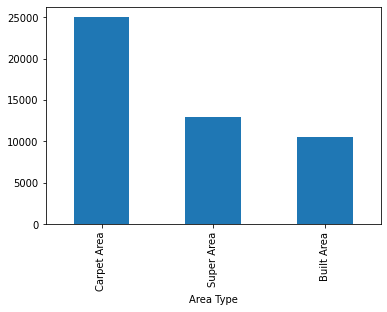

In [37]:
df.groupby('Area Type')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

***# We have 3 values in the "Area Type" column. From now on Super Area =0, Carpet Area= 1, Built Area =2.***

In [38]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Area Type"]= label_encoder.fit_transform(df["Area Type"])
  
df["Area Type"].unique()

array([2, 1, 0])

In [39]:
df["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

<AxesSubplot:xlabel='Furnishing Status'>

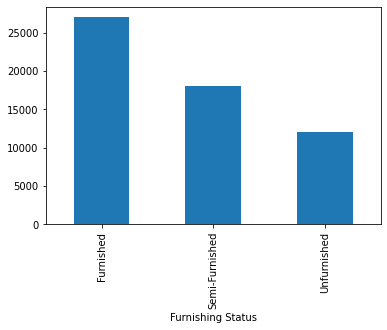

In [40]:
df.groupby('Furnishing Status')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

*** We have 3 values in the "Furnishing Status" column. From now on Unfurnished =0, Semi-Furnished= 1, Furnished =2.***

In [41]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Furnishing Status"]= label_encoder.fit_transform(df["Furnishing Status"])
  
df["Furnishing Status"].unique()

array([2, 1, 0])

In [42]:
df["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

<AxesSubplot:xlabel='Tenant Preferred'>

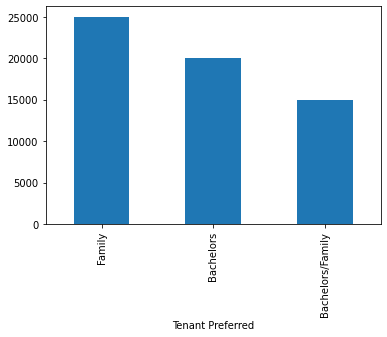

In [43]:
df.groupby("Tenant Preferred")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

***# We have 3 values in the "Tenant Preferred" column. From now on Bachelors/Family =0, Bachelors= 1, Family =2.***

In [44]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Tenant Preferred"]= label_encoder.fit_transform(df["Tenant Preferred"])
  
df["Tenant Preferred"].unique()

array([1, 0, 2])

In [45]:
df["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

*** We have 3 values in the "Point of Contact" column. From now on 'Contact Owner' =0, Contact Agent= 1, Contact Builder =2.***

In [46]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Point of Contact"]= label_encoder.fit_transform(df["Point of Contact"])
  
df["Point of Contact"].unique()

array([2, 0, 1])

In [47]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,10000,1100,2,Kolkata,2,1,2,2,0,2
1,2,20000,800,2,Kolkata,1,1,1,2,1,3
2,2,17000,1000,2,Kolkata,1,1,1,2,1,3
3,2,10000,800,2,Kolkata,2,1,1,2,1,2
4,2,7500,850,1,Kolkata,2,0,1,2,1,2


In [48]:
df["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

<AxesSubplot:xlabel='City'>

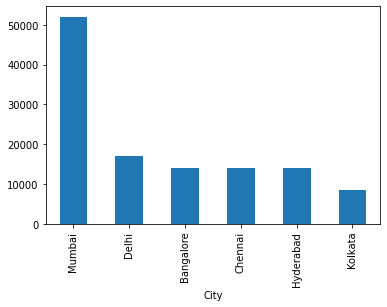

In [49]:
df.groupby("City")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

***# We have 6 cities in the "City" column. From now on 'Kolkata':0,'Mumbai':1,'Bangalore':2,'Delhi':3,'Chennai':4,'Hyderabad':5.***

In [50]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df['City']= label_encoder.fit_transform(df['City'])
  
df['City'].unique()

array([4, 5, 0, 2, 1, 3])

In [51]:
df.head(20)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,10000,1100,2,4,2,1,2,2,0,2
1,2,20000,800,2,4,1,1,1,2,1,3
2,2,17000,1000,2,4,1,1,1,2,1,3
3,2,10000,800,2,4,2,1,1,2,1,2
4,2,7500,850,1,4,2,0,1,2,1,2
5,2,7000,600,2,4,2,1,2,2,0,1
6,2,10000,700,2,4,2,0,2,0,0,4
7,1,5000,250,2,4,2,0,1,0,1,2
8,2,26000,800,1,4,2,0,2,0,1,2
9,2,10000,1000,1,4,1,1,2,2,1,3


***Our rent value and Size of the houses are so high, it is better to use minmax_scale to change these values from 0 to 1.***

In [52]:
#min-max scale
from sklearn.preprocessing import minmax_scale

df["Rent"] = minmax_scale(df["Rent"])

In [53]:
print(df["Rent"])

0       0.002515
1       0.005373
2       0.004516
3       0.002515
4       0.001801
          ...   
4741    0.003944
4742    0.007946
4743    0.009660
4744    0.012519
4745    0.003944
Name: Rent, Length: 4746, dtype: float64


In [54]:
from sklearn.preprocessing import minmax_scale

df["Size"] = minmax_scale(df["Size"])

In [55]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,0.002515,0.136421,2,4,2,1,2,2,0,2
1,2,0.005373,0.098874,2,4,1,1,1,2,1,3
2,2,0.004516,0.123905,2,4,1,1,1,2,1,3
3,2,0.002515,0.098874,2,4,2,1,1,2,1,2
4,2,0.001801,0.105131,1,4,2,0,1,2,1,2


# **ML**

In [56]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

*** split the dataset back to train and test sets
***

In [57]:
X=df.drop('Rent',axis=1)
y=df['Rent']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [58]:
models = {
    'Linear' : LinearRegression(),
    'ridge' : Ridge(),
    'xgboost' : XGBRegressor(),
    'catboost' : CatBoostRegressor(verbose=0),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4)
}

*** Training Different Models
***

In [59]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

Linear trained
ridge trained
xgboost trained
catboost trained
lightgbm trained
gradient boosting trained
lasso trained
random forest trained
bayesian ridge trained
support vector trained
knn trained


*** evulating the model.***

In [60]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv= kf)))
    results[name] = result

In [61]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

Linear : 0.016
ridge : 0.016
xgboost : 0.02
catboost : 0.018
lightgbm : 0.014
gradient boosting : 0.017
lasso : 0.02
random forest : 0.018
bayesian ridge : 0.016
support vector : 0.087
knn : 0.017


In [62]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,support vector,lasso,xgboost,random forest,catboost,gradient boosting,knn,Linear,ridge,bayesian ridge,lightgbm
RMSE,0.086939,0.020245,0.019549,0.017949,0.017506,0.017499,0.017204,0.016049,0.016048,0.016037,0.014156


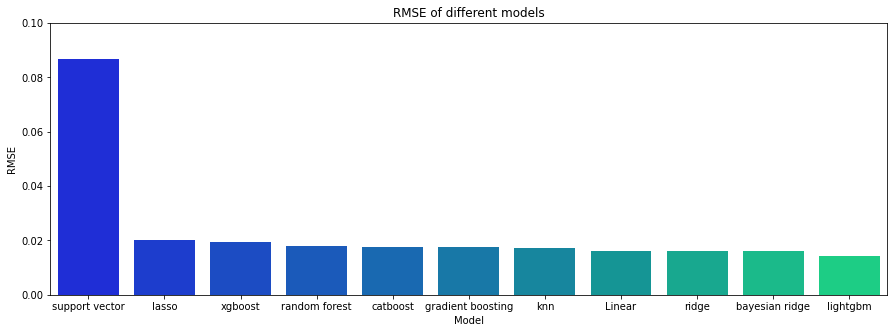

In [63]:
plt.figure(figsize = (15, 5))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.ylim(0,0.1)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

***Defining the Method in order to get the r2_score of each Model on Test Data and Based
# on that,We will select our Model***

In [64]:


def prediction(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred_data=np.exp(model.predict(X_test))
    return r2_score(np.exp(y_test),pred_data)

In [65]:
for name,model in models.items():
    score=prediction(model,X_train,y_train,X_test,y_test)
    print(f'{name} r2_score is {score}')

Linear r2_score is 0.4389670897310588
ridge r2_score is 0.438942860686074
xgboost r2_score is 0.4262832828206591
catboost r2_score is 0.48083628061488615
lightgbm r2_score is 0.6127910816992097
gradient boosting r2_score is 0.6194135849273206
lasso r2_score is -7.546012042114469e-06
random forest r2_score is 0.4195159912611581
bayesian ridge r2_score is 0.4373230275672848
support vector r2_score is -20.241897522520127
knn r2_score is 0.25718859392380766


***#we will try for linear and lightgbm boosting.***#Error of the Predicted Y with the True Y


*** Error of the Predicted Y with the True Y
***

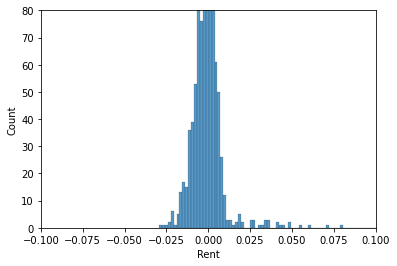

In [66]:
model=LinearRegression()
model.fit(X_train,y_train)
pred_y=np.exp(model.predict(X_test))
sns.histplot(np.exp(y_test)-pred_y)
plt.xlim(-0.1,0.1)
plt.ylim(0,80)
plt.show()

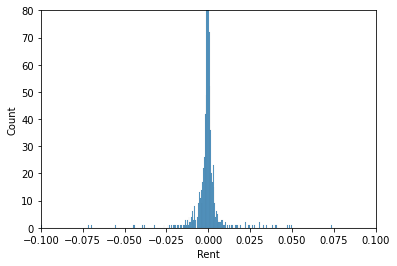

In [67]:
model=LGBMRegressor()
model.fit(X_train,y_train)
pred_y=np.exp(model.predict(X_test))
sns.histplot(np.exp(y_test)-pred_y)
plt.xlim(-0.1,0.1)
plt.ylim(0,80)
plt.show()

*** Applying Voting Ensemble on the 3 Models
***

In [68]:
from sklearn.ensemble import VotingRegressor
estimators=[('lr',LinearRegression()),('lgbm',LGBMRegressor())]
vc=VotingRegressor(estimators=estimators)
x=cross_val_score(vc,X_train,y_train,cv=10,scoring='r2')
print(np.round(np.mean(x),2))

0.58


*** Fitting the Model
***

In [69]:
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lgbm', LGBMRegressor())])

In [70]:
pred_y=vc.predict(X_test)
print(r2_score(np.exp(y_test),np.exp(pred_y)))

0.5998697162939679


***#only linear reg 0.43. linear reg+lgbm = 0.599=0.6***